## Imports

In [4]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import hopsworks
import pandas as pd
import numpy as np

## Login to Hopsworks

In [6]:
project = hopsworks.login(project = "lab1SMLDL")
fs = project.get_feature_store()


Connection closed.
Connected. Call `.close()` to terminate connection gracefully.



Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/231572
Connected. Call `.close()` to terminate connection gracefully.


## Load the DataFrame

In [7]:
wine_df = pd.read_csv("https://raw.githubusercontent.com/ID2223KTH/id2223kth.github.io/master/assignments/lab1/wine.csv")
wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Initial data operations

In [8]:
# Function to replace NaN values with random numbers from the range (min, max) of each column
def replace_nan_with_random(column):
    min_val = column.min()
    max_val = column.max()
    return column.apply(lambda x: np.random.uniform(min_val, max_val) if pd.isna(x) else x)

# To replace string for type with number
type_to_float = lambda str : 0.0 if str == 'white' else 1.0

# Apply the function to each column in the dataframe
wine_df = wine_df.apply(replace_nan_with_random)
wine_df['type'] = wine_df['type'].apply(type_to_float)
wine_df


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,0.0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,0.0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,0.0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,0.0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1.0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,1.0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.448492,11.2,6
6494,1.0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,1.0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


In [9]:
wine_df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [10]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   float64
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 660.0 KB


### Rename the columns to be able to upload it in hopsworks

In [11]:
wine_df_renamed = wine_df.rename(columns = lambda c : c.lower().replace(" ", "_"))

In [12]:
wine_df.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.246114,7.222485,0.340017,0.318994,5.445153,0.056131,30.525319,115.744574,0.994697,3.218706,0.531377,10.491801,5.818378
std,0.430779,1.310718,0.165289,0.146068,4.757645,0.035701,17.749400,56.521855,0.002999,0.161291,0.149046,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,0.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,0.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,0.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [13]:
wine_df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

### Feature selection


In [14]:
import hopsworks
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot
from hsml.schema import Schema
from hsml.model_schema import ModelSchema
import joblib
import os
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFE
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

In [15]:
wine_df_renamed.columns
features_df = wine_df_renamed[wine_df_renamed.columns.to_list()[:-1]]
target = wine_df_renamed['quality']


### Testing two different methods of feature selection

In [16]:
scores = list()
for n_features in range(2, 10):
    acs = []
    for sel in ['rfe', 'kbest']:
        if sel == 'rfe':
            selector = RFE(RandomForestClassifier(random_state = 0), n_features_to_select=n_features)
            selector.fit(features_df, target)
        else: 
            selector = SelectKBest(f_classif, k=n_features)
            selector.fit(features_df, target)
            # Get columns to keep and create new dataframe with those only
        cols_idxs = selector.get_support(indices=True)
        features_df_new = features_df.iloc[:,cols_idxs]
        x = features_df_new
        print(f"Selector {sel}, features are {x.columns}")
        y = target
        ros = RandomOverSampler(random_state=0)

        x,y = ros.fit_resample(x, y)
        X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
        model = RandomForestClassifier(random_state=0)
        model.fit(X_train, y_train.values.ravel())

        # Evaluate model performance using the features from the test set (X_test)
        y_pred = model.predict(X_test)
        print(f"Accuracy for selector {sel} and num_features {n_features} is {accuracy_score(y_true = y_test, y_pred = y_pred)}")
        acs.append(accuracy_score(y_true = y_test, y_pred = y_pred))
    scores.append(acs)    


Selector rfe, features are Index(['total_sulfur_dioxide', 'density'], dtype='object')
Accuracy for selector rfe and num_features 2 is 0.8836565096952909
Selector kbest, features are Index(['density', 'alcohol'], dtype='object')
Accuracy for selector kbest and num_features 2 is 0.87383530596827
Selector rfe, features are Index(['total_sulfur_dioxide', 'density', 'alcohol'], dtype='object')
Accuracy for selector rfe and num_features 3 is 0.9138755980861244
Selector kbest, features are Index(['volatile_acidity', 'density', 'alcohol'], dtype='object')
Accuracy for selector kbest and num_features 3 is 0.9060690002518257
Selector rfe, features are Index(['volatile_acidity', 'total_sulfur_dioxide', 'density', 'alcohol'], dtype='object')
Accuracy for selector rfe and num_features 4 is 0.9088390833543188
Selector kbest, features are Index(['volatile_acidity', 'chlorides', 'density', 'alcohol'], dtype='object')
Accuracy for selector kbest and num_features 4 is 0.9179048098715689
Selector rfe, fe

In [ ]:
scores
print("| Features | `RFE` | `SelectKBest` |  \n | :---: | :---: | :---: |")
for n in range(2,10):
    print(f"| {n} | {scores[n-2][0]} | {scores[n-2][1]} | ")

**The results**
| Features | `RFE` | `SelectKBest` |  
 | :---: | :---: | :---: |
| 2 | 0.8859229413246034 | 0.8627549735582977 | 
| 3 | 0.9060690002518257 | 0.9100982120372703 | 
| 4 | 0.9148829010324855 | 0.9098463863006799 | 
| 5 | 0.91891211281793 | 0.9176529841349786 | 
| 6 | 0.9209267187106522 | 0.9211785444472425 | 
| 7 | 0.9320070511206245 | 0.9224376731301939 | 
| 8 | 0.9257114077058676 | 0.9151347267690758 | 
| 9 | 0.9277260135985897 | 0.9347771342231176 | 

Eventually we chose what seemed to provide the best accuracy of the model.

In [18]:
selector = RFE(RandomForestClassifier(random_state = 0), n_features_to_select=7)
selector.fit(features_df, target)
cols_idxs = selector.get_support(indices=True)
features_df_new = features_df.iloc[:,cols_idxs]


### Correlation matrix
We also took a look at the correlation matrix to verify if the selected featuers are the most correlated ones. 


In [19]:
wine_df.corr()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,1.000000,0.481078,0.649579,-0.186458,-0.349063,0.501543,-0.471644,-0.700357,0.390645,0.325210,0.486435,-0.032970,-0.119323
fixed acidity,0.481078,1.000000,0.223662,0.316144,-0.110994,0.288457,-0.282159,-0.325955,0.452678,-0.247784,0.295551,-0.092854,-0.074764
volatile acidity,0.649579,0.223662,1.000000,-0.373001,-0.195327,0.367521,-0.350090,-0.410937,0.270463,0.255165,0.224759,-0.038722,-0.264622
citric acid,-0.186458,0.316144,-0.373001,1.000000,0.143580,0.039584,0.133947,0.196174,0.097401,-0.324667,0.056325,-0.012180,0.084160
residual sugar,-0.349063,-0.110994,-0.195327,0.143580,1.000000,-0.125316,0.403449,0.495788,0.552401,-0.264616,-0.185395,-0.359807,-0.036711
chlorides,0.501543,0.288457,0.367521,0.039584,-0.125316,1.000000,-0.188046,-0.271769,0.354292,0.039573,0.384327,-0.250036,-0.196775
free sulfur dioxide,-0.471644,-0.282159,-0.350090,0.133947,0.403449,-0.188046,1.000000,0.720934,0.025717,-0.143798,-0.188614,-0.179838,0.055463
total sulfur dioxide,-0.700357,-0.325955,-0.410937,0.196174,0.495788,-0.271769,0.720934,1.000000,0.032395,-0.235419,-0.275333,-0.265740,-0.041385
density,0.390645,0.452678,0.270463,0.097401,0.552401,0.354292,0.025717,0.032395,1.000000,0.011553,0.259447,-0.686745,-0.305858
pH,0.325210,-0.247784,0.255165,-0.324667,-0.264616,0.039573,-0.143798,-0.235419,0.011553,1.000000,0.190249,0.120013,0.020839


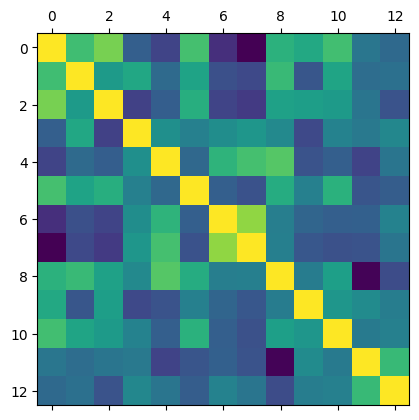

In [20]:
plt.matshow(wine_df.corr())
plt.show()

### Insert Wine Dataframe into a new feature group
A dataframe with only the selected features and the label

In [21]:
wine_df_reduced = wine_df_renamed.iloc[:,np.insert(cols_idxs, len(cols_idxs), 12)]

In [22]:
wine_df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   volatile_acidity      6497 non-null   float64
 1   residual_sugar        6497 non-null   float64
 2   chlorides             6497 non-null   float64
 3   total_sulfur_dioxide  6497 non-null   float64
 4   density               6497 non-null   float64
 5   sulphates             6497 non-null   float64
 6   alcohol               6497 non-null   float64
 7   quality               6497 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 406.2 KB


In [25]:
keys = features_df_new.columns
print(keys)

Index(['volatile_acidity', 'residual_sugar', 'chlorides',
       'total_sulfur_dioxide', 'density', 'sulphates', 'alcohol'],
      dtype='object')


In [24]:
wine_fg = fs.get_or_create_feature_group(
    name="wine",
    version=1,
    primary_key= keys, 
    description="Wine dataset with reduced features")
wine_fg.insert(wine_df_reduced)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/231572/fs/231491/fg/240974


Uploading Dataframe: 0.00% |          | Rows 0/6497 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: wine_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/231572/jobs/named/wine_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x17ff5136290>, None)